**1. Carga y Limpieza de Datos**

In [1]:
import pandas as pd
import numpy as np
from  scipy.stats import chi2_contingency
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# import os
# os.chdir("/content/drive/MyDrive/03. Investigaciones/2. Tuberculosis")

In [4]:
df = pd.read_excel("D:/03. Investigaciones/03.06 Tuberculosis/Base_limpia_Tuberculosis.xlsx")
df.drop(["Resultado","Resultado_2023_V1","Resultado_2023_V2", "Nombres"], axis=1, inplace=True)
df.rename(columns={"Resultado_2023_Junio": "Resultado"}, inplace=True)
df.head(2)

,INDICE,SD_Pacientes,SD_Educativo,SD_ExposicionLaboral,SD_CargaFamiliar,SD_CompañiaCasa,SD_Edad,Clin_CondicionSalud,Clin_Alcohol,Clin_Cigarro,...,PSIC_Estres,PSIC_Evitacion,PSIC_Hiperactividad,PSIC_INTRUSION,PSIC_Ansiedad,PSIC_Depresion,PSIC_Alcohol,PSIC_Psicotico,PSIC_Convulsivo,Resultado
0,126,Hombre,Colegio completo,Sin contacto al público,[Con carga familiar],[VIVE ACOMPAÑADO],[15-59],CON COMORBILIDAD,He dejado de tomar hace un tiempo,He dejado de fumar hace un tiempo,...,Alto,Leve,Medio,Leve,Moderado,Depresión mayor MODERADA,No presenta,No presenta,No presenta,CURADO
1,32,Hombre,Colegio completo,Sin contacto al público,[Sin carga familiar],[VIVE ACOMPAÑADO],[15-59],SIN COMORBILIDAD,Nunca he bebido alcohol,Nunca he fumado,...,Alto,Leve,Leve,Leve,Leve,Sin síntomas,No presenta,Sí presenta,No presenta,CURADO


In [5]:
df.nunique()

INDICE                   136
SD_Pacientes               2
SD_Educativo               4
SD_ExposicionLaboral       3
SD_CargaFamiliar           2
SD_CompañiaCasa            2
SD_Edad                    3
Clin_CondicionSalud        2
Clin_Alcohol               3
Clin_Cigarro               3
Clin_covid                 3
Clin_TipoTuberculosis      3
Clin_IMC                   4
Clin_UbicacionLesion       2
PSIC_Estres                1
PSIC_Evitacion             3
PSIC_Hiperactividad        2
PSIC_INTRUSION             3
PSIC_Ansiedad              3
PSIC_Depresion             4
PSIC_Alcohol               2
PSIC_Psicotico             2
PSIC_Convulsivo            2
Resultado                 16
dtype: int64

In [6]:
df.Resultado[df.Resultado=="CURADO"] = "Tratamiento completo"
df.Resultado[df.Resultado=='TRATAMIENTO COMPLETO'] = "Tratamiento completo"
df.Resultado[df.Resultado== 'CURADO                                                '] = "Tratamiento completo"
df.Resultado[df.Resultado== 'CURADO '] = "Tratamiento completo"
df.Resultado[df.Resultado== 'NO REGISTRADO '] = "No se identifica paciente"
df.Resultado[df.Resultado== 'EN TRATAMIENTO TB XDR'] = "En tratamiento"
df.Resultado[df.Resultado== 'EN TRATAMIENTO   TB MDR'] = "En tratamiento"
df.Resultado[df.Resultado== 'EN TRATAMIENTO   TB MDR '] = "En tratamiento"
df.Resultado[df.Resultado== 'EN TRATAMIENTO TB MDR'] = "En tratamiento"
df.Resultado[df.Resultado== 'FALTA EL SEGUNDO APELLIDO'] = "No se identifica paciente"
df.Resultado[df.Resultado== 'EXCLUSION POR TBR'] = "Exclusion por TBR"
df.Resultado[df.Resultado=='TRATAMIENTO COMPLETO '] = "Tratamiento completo"
df.Resultado[df.Resultado=='TRANSFERIDA A ESSALUD'] = "No se identifica paciente"
df.Resultado[df.Resultado=='ABANDONO '] = "Abandono"
df.Resultado[df.Resultado=='ABANDONO'] = "Abandono"
df.Resultado[df.Resultado == "EN TRATAMIENTO DROGORESISTENTE"] = "En tratamiento"
df.Resultado[df.Resultado == "FRACASO"] = "Fracaso"

In [7]:
#Se eliminan registros ya que las categorias no corresponden para el analisis
df.drop(df[(df.Resultado == "En tratamiento") | (df.Resultado == "No se identifica paciente") | (df.Resultado == "Exclusion por TBR")].index, inplace=True)
#Se eliminan registros ya que corresponden a los mismos pacientes
df.drop(df[(df["INDICE"] == 5) | (df["INDICE"] == 9)].index, inplace=True)
#---------------------------------------------------------------------------------------------#
df.SD_Educativo[df.SD_Educativo=="Colegio completo"] = "Colegio completo"
df.SD_Educativo[df.SD_Educativo=="Colegio incompleto"] = "Colegio incompleto"
df.SD_Educativo[df.SD_Educativo=="Estudios superiores"] = "Colegio completo"
df.SD_Educativo[df.SD_Educativo=="No estudio en el colegio"] = "Colegio incompleto"
#---------------------------------------------------------------------------------------------#
df.SD_ExposicionLaboral[df.SD_ExposicionLaboral=="sin trabajo definido"] = "Sin contacto al público"
#---------------------------------------------------------------------------------------------#
df.SD_Edad[df.SD_Edad=="[0-14]"] = "[15-59]"
#---------------------------------------------------------------------------------------------#
df.Clin_Alcohol[df.Clin_Alcohol=="Nunca he bebido alcohol"] = "No toma o ha dejado de tomar alcohol"
df.Clin_Alcohol[df.Clin_Alcohol=="He dejado de tomar hace un tiempo"] = "No toma o ha dejado de tomar alcohol"
#---------------------------------------------------------------------------------------------#
df.Clin_Cigarro[df.Clin_Cigarro=="Nunca he fumado"] = "No fumo o ha dejado de fumar"
df.Clin_Cigarro[df.Clin_Cigarro=="He dejado de fumar hace un tiempo"] = "No fumo o ha dejado de fumar"
#---------------------------------------------------------------------------------------------#
df.Clin_covid[df.Clin_covid=="Sí, enferme por primera vez en el 2020"] = "Si ha tenido COVID"
df.Clin_covid[df.Clin_covid=="Sí, enferme por primera en el 2021"] = "Si ha tenido COVID"
#---------------------------------------------------------------------------------------------#
df.Clin_covid[df.Clin_covid=="Sí, enferme por primera vez en el 2020"] = "Si ha tenido COVID"
df.Clin_covid[df.Clin_covid=="Sí, enferme por primera en el 2021"] = "Si ha tenido COVID"
#---------------------------------------------------------------------------------------------#
df.Clin_TipoTuberculosis[df.Clin_TipoTuberculosis=="TUBERCULOSIS EXTREMADAMENTE RESISTENTE"] = "TUBERCULOSIS RESISTENTE O EXTREMADAMENTE R"
#---------------------------------------------------------------------------------------------#
df.Clin_IMC[df.Clin_IMC=="Obesidad"] = "Extremos_IMC"
df.Clin_IMC[df.Clin_IMC=="Excesiva Delgadez"] = "Extremos_IMC"
df.Clin_IMC[df.Clin_IMC=="Peso Ideal"] = "Peso Ideal y Sobrepeso "
df.Clin_IMC[df.Clin_IMC=="Sobrepeso"] = "Peso Ideal y Sobrepeso "
#---------------------------------------------------------------------------------------------#
df.PSIC_Evitacion[df.PSIC_Evitacion=="Medio"] = "Medio y Alto"
df.PSIC_Evitacion[df.PSIC_Evitacion=="Alto"] = "Medio y Alto"
#---------------------------------------------------------------------------------------------#
df.PSIC_INTRUSION[df.PSIC_INTRUSION=="Medio"] = "Medio y Alto"
df.PSIC_INTRUSION[df.PSIC_INTRUSION=="Alto"] = "Medio y Alto"
#---------------------------------------------------------------------------------------------#
df.PSIC_Ansiedad[df.PSIC_Ansiedad == "Leve"] = "leve o menos"
df.PSIC_Ansiedad[df.PSIC_Ansiedad == "Moderado"] = "moderado o más"
df.PSIC_Ansiedad[df.PSIC_Ansiedad == "Severo"] = "moderado o más"
#---------------------------------------------------------------------------------------------#
df.PSIC_Depresion[df.PSIC_Depresion=="Sin síntomas"] = "Leve o menos"
df.PSIC_Depresion[df.PSIC_Depresion=="Síntomas mínimos o leves"] = "Leve o menos"
df.PSIC_Depresion[df.PSIC_Depresion=="Depresión mayor LEVE"] = "Leve mayor a más"
df.PSIC_Depresion[df.PSIC_Depresion=="Depresión mayor MODERADA"] = "Leve mayor a más"
#---------------------------------------------------------------------------------------------#
df.Clin_TipoTuberculosis[df.Clin_TipoTuberculosis=="TUBERCULOSIS RESISTENTE"] = "RESISTENTE a MAS"
df.Clin_TipoTuberculosis[df.Clin_TipoTuberculosis=="TUBERCULOSIS RESISTENTE O EXTREMADAMENTE R"] = "RESISTENTE a MAS"

In [8]:
df.nunique()

INDICE                   121
SD_Pacientes               2
SD_Educativo               2
SD_ExposicionLaboral       2
SD_CargaFamiliar           2
SD_CompañiaCasa            2
SD_Edad                    2
Clin_CondicionSalud        2
Clin_Alcohol               2
Clin_Cigarro               2
Clin_covid                 2
Clin_TipoTuberculosis      2
Clin_IMC                   2
Clin_UbicacionLesion       2
PSIC_Estres                1
PSIC_Evitacion             2
PSIC_Hiperactividad        2
PSIC_INTRUSION             2
PSIC_Ansiedad              2
PSIC_Depresion             2
PSIC_Alcohol               2
PSIC_Psicotico             2
PSIC_Convulsivo            2
Resultado                  3
dtype: int64

In [9]:
df.rename(columns={"Clin_CondicionSalud" :"Clin_Comorbilidad", "SD_Pacientes" : "SD_Género", "PSIC_INTRUSION": "PSIC_Intrusion" })

,INDICE,SD_Género,SD_Educativo,SD_ExposicionLaboral,SD_CargaFamiliar,SD_CompañiaCasa,SD_Edad,Clin_Comorbilidad,Clin_Alcohol,Clin_Cigarro,...,PSIC_Estres,PSIC_Evitacion,PSIC_Hiperactividad,PSIC_Intrusion,PSIC_Ansiedad,PSIC_Depresion,PSIC_Alcohol,PSIC_Psicotico,PSIC_Convulsivo,Resultado
0,126,Hombre,Colegio completo,Sin contacto al público,[Con carga familiar],[VIVE ACOMPAÑADO],[15-59],CON COMORBILIDAD,No toma o ha dejado de tomar alcohol,No fumo o ha dejado de fumar,...,Alto,Leve,Medio,Leve,moderado o más,Leve mayor a más,No presenta,No presenta,No presenta,Tratamiento completo
1,32,Hombre,Colegio completo,Sin contacto al público,[Sin carga familiar],[VIVE ACOMPAÑADO],[15-59],SIN COMORBILIDAD,No toma o ha dejado de tomar alcohol,No fumo o ha dejado de fumar,...,Alto,Leve,Leve,Leve,leve o menos,Leve o menos,No presenta,Sí presenta,No presenta,Tratamiento completo
2,30,Hombre,Colegio completo,Con contacto al público,[Con carga familiar],[VIVE ACOMPAÑADO],[15-59],SIN COMORBILIDAD,No toma o ha dejado de tomar alcohol,No fumo o ha dejado de fumar,...,Alto,Leve,Leve,Leve,leve o menos,Leve o menos,No presenta,No presenta,No presenta,Tratamiento completo
3,109,Hombre,Colegio completo,Sin contacto al público,[Sin carga familiar],[VIVE ACOMPAÑADO],[60-más],SIN COMORBILIDAD,No toma o ha dejado de tomar alcohol,No fumo o ha dejado de fumar,...,Alto,Leve,Medio,Leve,moderado o más,Leve o menos,Sí presenta,Sí presenta,No presenta,Tratamiento completo
4,29,Hombre,Colegio completo,Sin contacto al público,[Con carga familiar],[VIVE ACOMPAÑADO],[15-59],SIN COMORBILIDAD,No toma o ha dejado de tomar alcohol,No fumo o ha dejado de fumar,...,Alto,Leve,Leve,Leve,leve o menos,Leve o menos,No presenta,No presenta,No presenta,Tratamiento completo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,93,Hombre,Colegio completo,Sin contacto al público,[Con carga familiar],[VIVE ACOMPAÑADO],[15-59],SIN COMORBILIDAD,No toma o ha dejado de tomar alcohol,No fumo o ha dejado de fumar,...,Alto,Medio y Alto,Leve,Medio y Alto,moderado o más,Leve o menos,No presenta,No presenta,No presenta,Tratamiento completo
131,110,Mujer,Colegio completo,Con contacto al público,[Con carga familiar],[VIVE ACOMPAÑADO],[15-59],SIN COMORBILIDAD,No toma o ha dejado de tomar alcohol,No fumo o ha dejado de fumar,...,Alto,Leve,Leve,Leve,leve o menos,Leve o menos,No presenta,Sí presenta,No presenta,Tratamiento completo
132,124,Hombre,Colegio completo,Sin contacto al público,[Sin carga familiar],[VIVE ACOMPAÑADO],[15-59],SIN COMORBILIDAD,No toma o ha dejado de tomar alcohol,No fumo o ha dejado de fumar,...,Alto,Medio y Alto,Medio,Medio y Alto,moderado o más,Leve o menos,No presenta,No presenta,No presenta,Tratamiento completo
134,38,Hombre,Colegio completo,Sin contacto al público,[Sin carga familiar],[VIVE ACOMPAÑADO],[15-59],SIN COMORBILIDAD,No toma o ha dejado de tomar alcohol,No fumo o ha dejado de fumar,...,Alto,Medio y Alto,Leve,Leve,leve o menos,Leve o menos,No presenta,No presenta,No presenta,Tratamiento completo


Se generan nuevas columnas según el tipo de resultado

In [10]:
df["Resultado_Psicologico"] = ""
df.loc[df["Resultado"] == "Tratamiento completo", "Resultado_Psicologico"]  = "TERMINÓ"
df.loc[df["Resultado"] == "Fracaso", "Resultado_Psicologico"]               = "TERMINÓ"
df.loc[df["Resultado"] == "Abandono", "Resultado_Psicologico"]               = "NO TERMINÓ"

df["Resultado_Clinico_SocioDemog"] = ""
df.loc[df["Resultado"] == "Tratamiento completo", "Resultado_Clinico_SocioDemog"]  = "CURADO"
df.loc[df["Resultado"] == "Fracaso", "Resultado_Clinico_SocioDemog"]  = "NO CURADO"
df.loc[df["Resultado"] == "Abandono", "Resultado_Clinico_SocioDemog"]  = "NO CURADO"

In [11]:
df_clin = df.drop(["Resultado_Psicologico","INDICE","Resultado"], axis = 1).copy()
df_psic = df.drop(["Resultado_Clinico_SocioDemog","INDICE","Resultado"], axis = 1) .copy()
df = df.drop(["INDICE","Resultado_Psicologico","Resultado_Clinico_SocioDemog"], axis=1)
# df_clin.dropna(inplace = True)
# df_psic.dropna(inplace = True)

**2. Chi-Square de cada Variable vs Resultado**

In [12]:
from scipy import stats

def chi2_by_hand(df, col1, col2):    

    #---create the contingency table---
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])

    #---calculate degree of freedom---
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)

    #---sum up the totals for row and columns---
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()

    #---create the expected value dataframe---
    df_exp = df_cont.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(
        df_cont.sum(1).values,df_cont.sum().values) / df_cont.sum().sum()     

    # calculate chi-square values
    df_chi2 = ((df_cont - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()

    #---get chi-square score---   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)

    return chi_square_score, degree_f, p

**2.1. Todas las variables clinicas-sociodemo y psicologicas Vs Resultado Psicológico**

In [13]:
#Creamos los valores de Chi2, Grados_libertad y P_valor
Chi2            = []
Grados_libertad = []
P_valor         = []
for i in df_psic.columns:
    #Vamos a iterar todas las columnas vs Resultado, por eso excluimos a "Resultados" de la iteración
    if i == "Resultado_Psicologico":
        break
    #Aqui obtenemos los valores y los guardamos en listas
    Chi2.append(round(chi2_by_hand(df_psic,i,'Resultado_Psicologico')[0],4))
    Grados_libertad.append(chi2_by_hand(df_psic,i,'Resultado_Psicologico')[1])
    P_valor.append(round(chi2_by_hand(df_psic,i,'Resultado_Psicologico')[2],4))

#Luego vamos a llevar todos los nombres de las variables que se evaluaron contra "Resultados" a una lista 
Variables = []
for i in range(len(df_psic.columns)-1):
    Variables.append(df_psic.columns.to_list()[:len(df_psic.columns)-1][i] + " - " + df_psic.columns.to_list()[-1])

#Juntamos 
Resultados = pd.DataFrame({"Variables":Variables,"Chi2": Chi2,"Grados_libertad": Grados_libertad, "P_valor": P_valor})

print(f"La cantidad total de registros que se analizaron fue: {len(df_psic)}. Siento los resultados los siguientes: ")
Resultados.sort_values("P_valor")


La cantidad total de registros que se analizaron fue: 121. Siento los resultados los siguientes: 


,Variables,Chi2,Grados_libertad,P_valor
6,Clin_CondicionSalud - Resultado_Psicologico,7.6636,1,0.0056
4,SD_CompañiaCasa - Resultado_Psicologico,3.3149,1,0.0687
0,SD_Pacientes - Resultado_Psicologico,3.1989,1,0.0737
8,Clin_Cigarro - Resultado_Psicologico,2.5038,1,0.1136
10,Clin_TipoTuberculosis - Resultado_Psicologico,2.0825,1,0.1490
11,Clin_IMC - Resultado_Psicologico,1.8646,1,0.1721
20,PSIC_Psicotico - Resultado_Psicologico,1.0595,1,0.3033
5,SD_Edad - Resultado_Psicologico,0.6278,1,0.4282
7,Clin_Alcohol - Resultado_Psicologico,0.5935,1,0.4411
12,Clin_UbicacionLesion - Resultado_Psicologico,0.4699,1,0.4930


**2.2. Todas las variables clinicas-sociodemo y psicologicas vs Resultado Clinico**

In [14]:
#Creamos los valores de Chi2, Grados_libertad y P_valor
Chi2            = []
Grados_libertad = []
P_valor         = []
for i in df_clin.columns:
    #Vamos a iterar todas las columnas vs Resultado, por eso excluimos a "Resultados" de la iteración
    if i == "Resultado_Clinico_SocioDemog":
        break
    #Aqui obtenemos los valores y los guardamos en listas
    Chi2.append(round(chi2_by_hand(df_clin,i,'Resultado_Clinico_SocioDemog')[0],4))
    Grados_libertad.append(chi2_by_hand(df_clin,i,'Resultado_Clinico_SocioDemog')[1])
    P_valor.append(round(chi2_by_hand(df_clin,i,'Resultado_Clinico_SocioDemog')[2],4))

#Luego vamos a llevar todos los nombres de las variables que se evaluaron contra "Resultados" a una lista 
Variables = []
for i in range(len(df_clin.columns)-1):
    Variables.append(df_clin.columns.to_list()[:len(df_clin.columns)-1][i] + " - " + df_clin.columns.to_list()[-1])

#Juntamos 
Resultados = pd.DataFrame({"Variables":Variables,"Chi2": Chi2,"Grados_libertad": Grados_libertad, "P_valor": P_valor})

print(f"La cantidad total de registros que se analizaron fue: {len(df_clin)}. Siento los resultados los siguientes: ")
Resultados.sort_values("P_valor")


La cantidad total de registros que se analizaron fue: 121. Siento los resultados los siguientes: 


,Variables,Chi2,Grados_libertad,P_valor
6,Clin_CondicionSalud - Resultado_Clinico_SocioD...,6.3045,1,0.0120
0,SD_Pacientes - Resultado_Clinico_SocioDemog,4.5570,1,0.0328
10,Clin_TipoTuberculosis - Resultado_Clinico_Soci...,3.7329,1,0.0534
20,PSIC_Psicotico - Resultado_Clinico_SocioDemog,2.0111,1,0.1561
4,SD_CompañiaCasa - Resultado_Clinico_SocioDemog,1.9335,1,0.1644
19,PSIC_Alcohol - Resultado_Clinico_SocioDemog,1.5253,1,0.2168
8,Clin_Cigarro - Resultado_Clinico_SocioDemog,1.3715,1,0.2416
2,SD_ExposicionLaboral - Resultado_Clinico_Socio...,1.1161,1,0.2908
5,SD_Edad - Resultado_Clinico_SocioDemog,0.8943,1,0.3443
11,Clin_IMC - Resultado_Clinico_SocioDemog,0.6516,1,0.4195


**3. Evaluación de Chi-Square entre todas las variables**

In [15]:
#Se crea un dataframe con las columnas e indice igual a los variables del dataframe original, el contenido por ahora se rellena con ceros
#En el siguiente paso estos ceros serán reemplazados con el valor de p_valor
matriz = np.random.randint(1, size=(22, 22))
df_all = pd.DataFrame(data=matriz,columns=df.columns[:-1],index = df.columns[:-1].to_list())
df_all.head(3)

#Se reemplazaran los valores internos de tabla que se creo por los valores de P_valor
# a va a servir aumentar cada fila que se recorra
a = 0
for i in df_all.index:
    # b va a servir aumentar cada columna que se recorra, vuelve a cero cuando ha pasado por todas las columnas para que ahora itere con la siguiente fila
    b = 0
    for j in df_all.columns:
        #Los valores de la celda seleccionada [a,b] va a ser reemplazado, por el valor de chi-square que corresponda
        df_all.iloc[a,b] = round(chi2_by_hand(df,i,j)[2],4)
        #cada vez que la columna haya sido evaluada se suma 1
        b = b+1
    #cada vez que la fila haya sido evaluada se suma 1
    a = a+1

**3.1. Variables de Clinico - Social vs Variables de Psicológico**

In [16]:
#Aqui tenemos el resultado de la primera parte: Clinico - Social vs Psicológico
df_CliDemo_Psic = df_all.iloc[:13][['PSIC_Estres', 'PSIC_Evitacion', 'PSIC_Hiperactividad', 'PSIC_INTRUSION', 'PSIC_Ansiedad', 'PSIC_Depresion', 'PSIC_Alcohol', 'PSIC_Psicotico', 'PSIC_Convulsivo']]

#Presentamos los resultados
def color_negative_red(val):
    color = 'orange' if val < 0.05 else 'white'
    return 'color: %s' % color

df_CliDemo_Psic.style.applymap(color_negative_red)

,PSIC_Estres,PSIC_Evitacion,PSIC_Hiperactividad,PSIC_INTRUSION,PSIC_Ansiedad,PSIC_Depresion,PSIC_Alcohol,PSIC_Psicotico,PSIC_Convulsivo
SD_Pacientes,nan,0.736200,0.431600,0.262400,0.431800,0.200500,0.005000,0.334700,0.199800
SD_Educativo,nan,0.374800,0.619100,0.159400,0.194300,0.013300,0.102600,0.513400,0.145400
SD_ExposicionLaboral,nan,0.084300,0.387700,0.554400,0.092100,0.830200,0.048700,0.516900,0.335300
SD_CargaFamiliar,nan,0.262400,0.471200,0.472400,0.768900,0.376900,0.219600,0.981000,0.505100
SD_CompañiaCasa,nan,0.180100,0.243000,0.894400,0.129600,0.281700,0.647800,0.232200,0.834900
SD_Edad,nan,0.824100,0.520100,0.188400,0.987400,0.628100,0.266900,0.570700,0.003800
Clin_CondicionSalud,nan,0.005400,0.004100,0.002900,0.225300,0.137800,0.013500,0.490600,0.223500
Clin_Alcohol,nan,0.032200,0.345200,0.333400,0.658600,0.886000,0.030300,0.242400,0.739000
Clin_Cigarro,nan,0.140300,0.818600,0.505400,0.289500,0.323600,0.000000,0.768100,0.818600
Clin_covid,nan,0.013300,0.001200,0.000800,0.044800,0.245000,0.219600,0.156400,0.130300


**3.2. Todas las variables vs todas las variables**

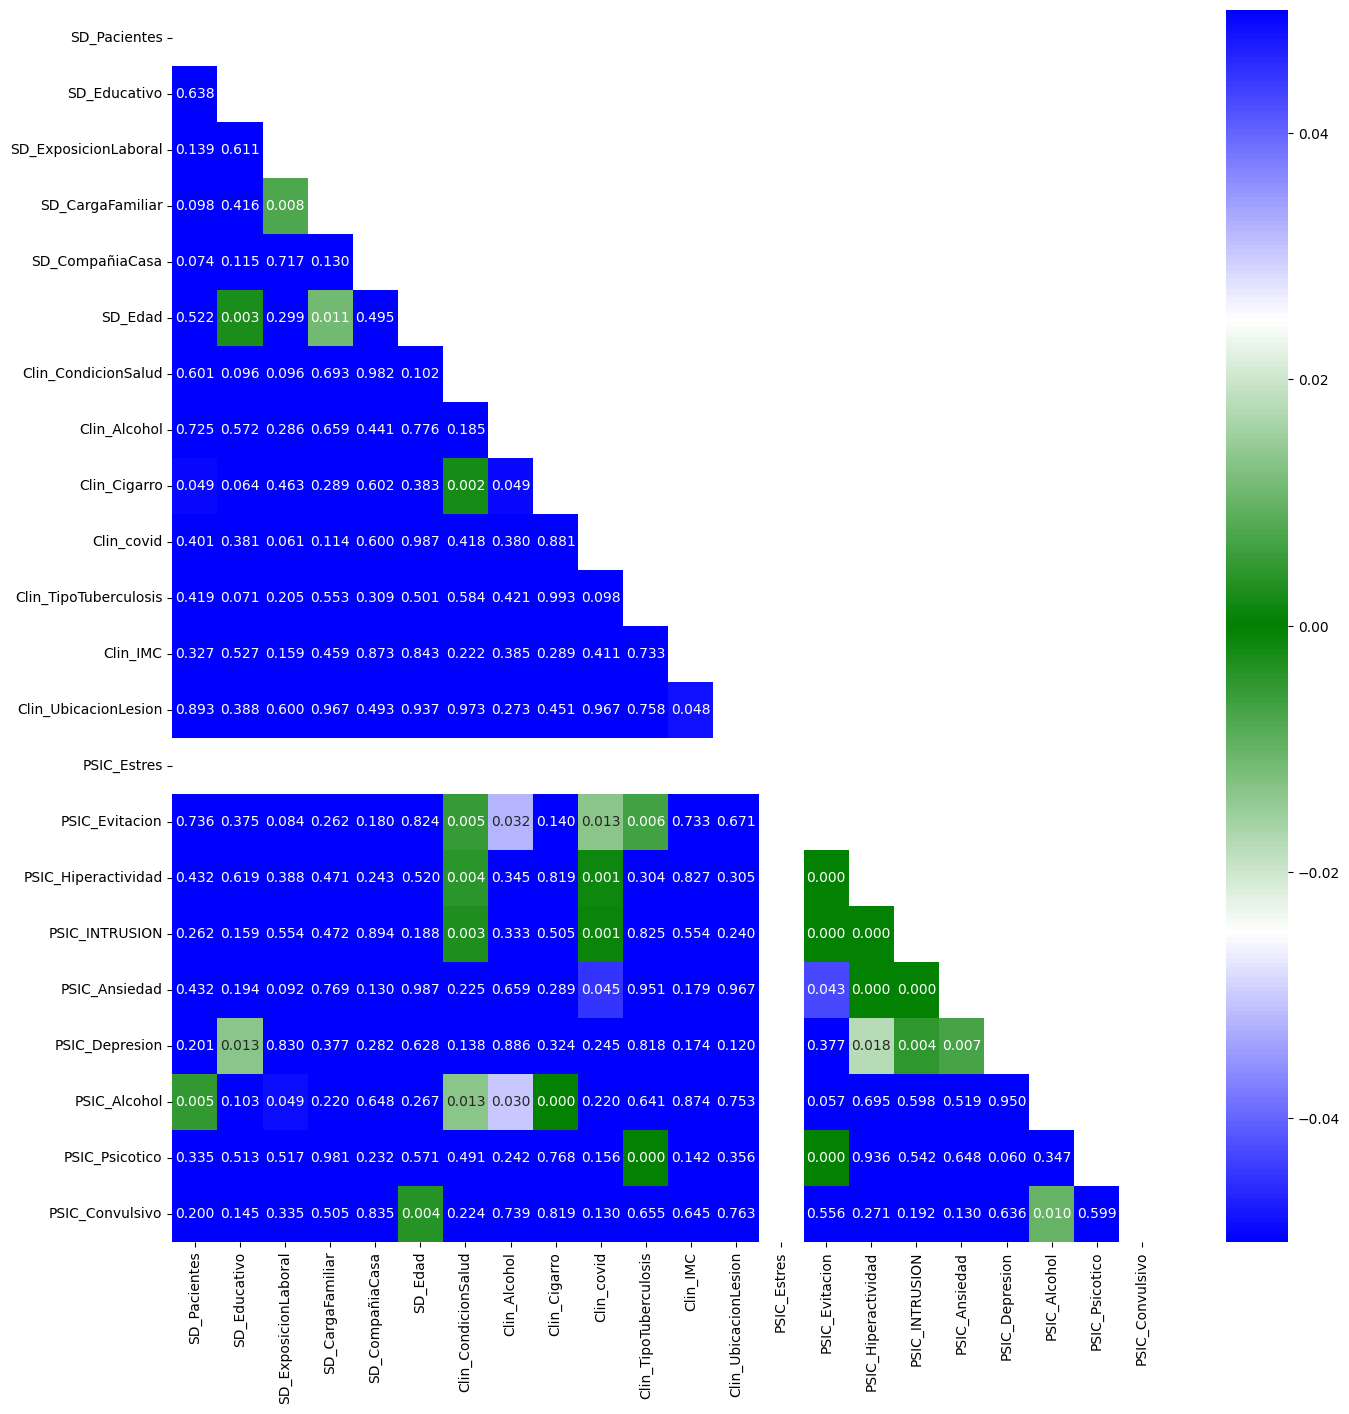

In [17]:
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=[16,16])

cmap = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['blue','white','green','white','blue']
)
	
mask_ut=np.triu(np.ones(df_all.shape)).astype(np.bool)
mask_ut[0:5,0:5]

dataplot = sns.heatmap(df_all,  mask = mask_ut, fmt=".3f", annot=True, cmap = cmap, vmin=-0.05, vmax= 0.05)

plt.show()


### 4. Analisis de Regresion Lineal

In [18]:
df.columns[:-1]

Index(['SD_Pacientes', 'SD_Educativo', 'SD_ExposicionLaboral',
       'SD_CargaFamiliar', 'SD_CompañiaCasa', 'SD_Edad', 'Clin_CondicionSalud',
       'Clin_Alcohol', 'Clin_Cigarro', 'Clin_covid', 'Clin_TipoTuberculosis',
       'Clin_IMC', 'Clin_UbicacionLesion', 'PSIC_Estres', 'PSIC_Evitacion',
       'PSIC_Hiperactividad', 'PSIC_INTRUSION', 'PSIC_Ansiedad',
       'PSIC_Depresion', 'PSIC_Alcohol', 'PSIC_Psicotico', 'PSIC_Convulsivo'],
      dtype='object')

In [19]:
#Definimos cuales solas variables predictoras de clinic_sociodemog
df_1 = df[['SD_Pacientes', 'SD_Educativo', 'SD_ExposicionLaboral', 'SD_CargaFamiliar', 'SD_CompañiaCasa', 'SD_Edad', 'Clin_CondicionSalud', 
           'Clin_Alcohol', 'Clin_Cigarro', 'Clin_covid', 'Clin_TipoTuberculosis', 'Clin_IMC', 'Clin_UbicacionLesion']]

#Definimos cuales solas variables predictoras de psicologicas
df_2 = df[['PSIC_Estres', 'PSIC_Evitacion', 'PSIC_Hiperactividad', 'PSIC_INTRUSION', 'PSIC_Ansiedad', 'PSIC_Depresion', 'PSIC_Alcohol', 'PSIC_Psicotico', 'PSIC_Convulsivo']]

#definimos todas las variables 
df_todas = df[df.columns[:-1]]

# Definimos los target
df_resultado = df[["Resultado"]]
df_resultado_clin_socio = df_psic[["Resultado_Psicologico"]]
df_resultado_psic       = df_clin[["Resultado_Clinico_SocioDemog"]]


Rmse:0.182, R2:0.163


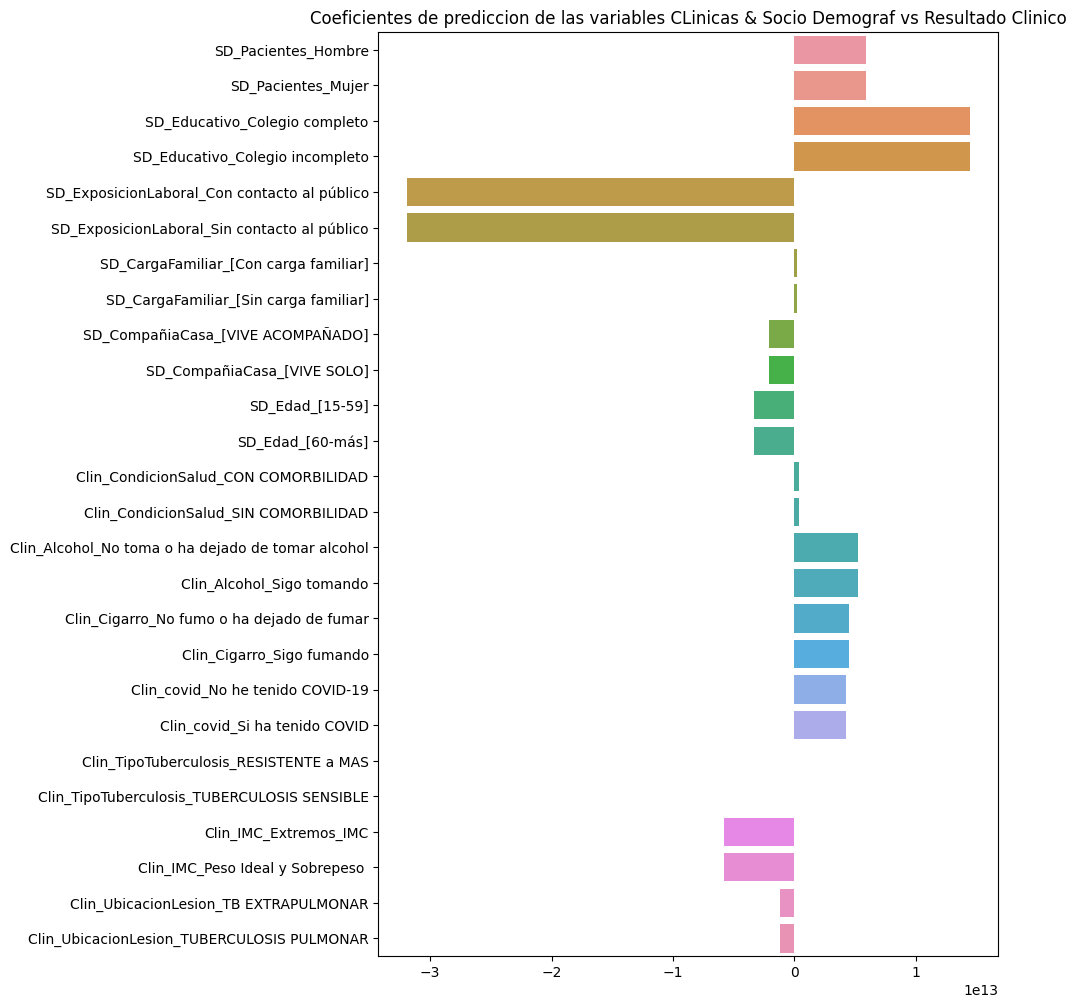

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing 


#Realizamos el cambio de Variables Categóricas a Variables Numéricas
label_encoder = preprocessing.LabelEncoder()

#Partimos los datos, entre la variables predictoras y el resultado
predictors = pd.get_dummies(df_1)
outcome     = label_encoder.fit_transform(df_resultado_clin_socio)

#Inicializamos el modelo de regresion lineal
model_linear = LinearRegression()

#Entrenamos el modelo 
model_linear.fit(predictors, outcome)

#Determinación del Error cuadrático medio y del R2
model_linear_predict = model_linear.predict(predictors)
rmse = np.sqrt(mean_squared_error(outcome,model_linear_predict))

r2 = r2_score(outcome,model_linear_predict)

print(f"Rmse:{rmse:.3f}, R2:{r2:.3f}")

coefs = pd.DataFrame(model_linear.coef_, index=predictors.columns, columns=['beta_value'])
# print(coefs)
# Visualize crude measure of feature importance.
plt.figure(figsize=[8,12])
sns.barplot(data=coefs.T, orient='h').set(title=f'Coeficientes de prediccion de las variables CLinicas & Socio Demograf vs Resultado Clinico')
plt.show()

Rmse:0.228, R2:0.048


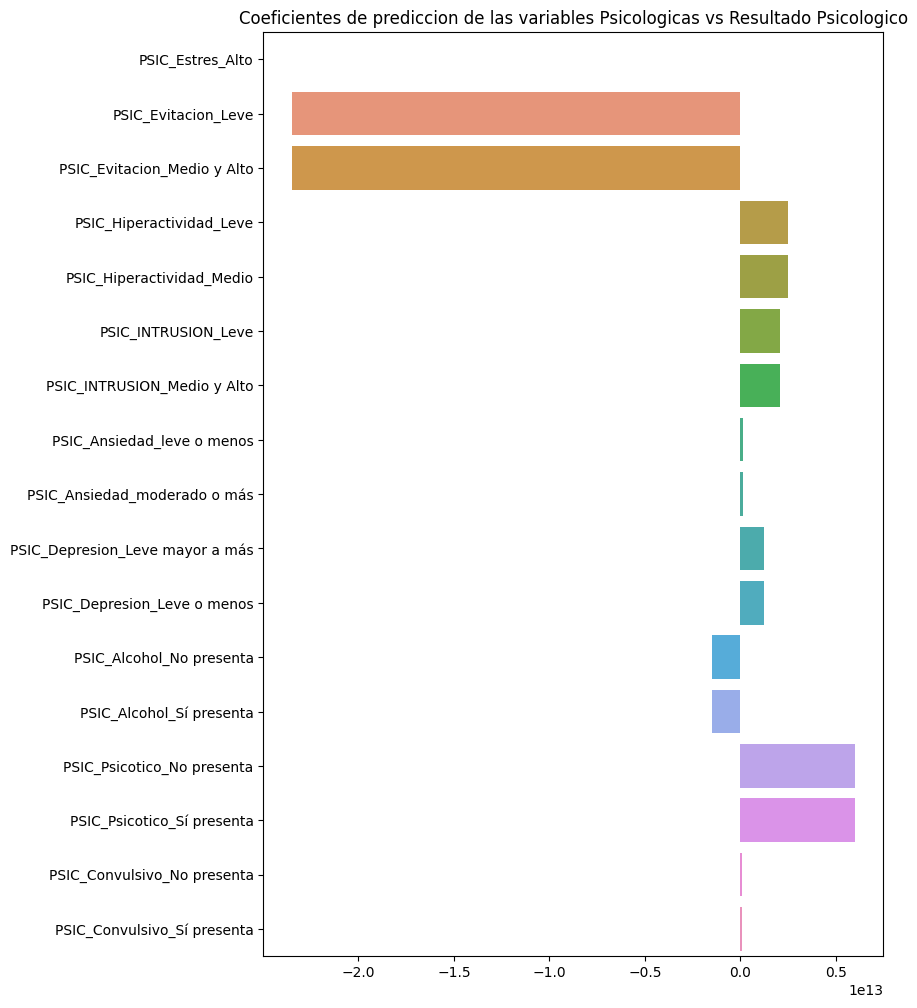

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing 

#Realizamos el cambio de Variables Categóricas a Variables Numéricas
label_encoder = preprocessing.LabelEncoder()

#Partimos los datos, entre la variables predictoras y el resultado
predictors = pd.get_dummies(df_2)
outcome     = label_encoder.fit_transform(df_resultado_psic)

#Inicializamos el modelo de regresion lineal
model_linear = LinearRegression()

#Entrenamos el modelo 
model_linear.fit(predictors, outcome)

#Determinación del Error cuadrático medio y del R2
model_linear_predict = model_linear.predict(predictors)
rmse = np.sqrt(mean_squared_error(outcome,model_linear_predict))

r2 = r2_score(outcome,model_linear_predict)

print(f"Rmse:{rmse:.3f}, R2:{r2:.3f}")

coefs = pd.DataFrame(model_linear.coef_, index=predictors.columns, columns=['beta_value'])
# print(coefs)
# Visualize crude measure of feature importance.
plt.figure(figsize=[8,12])
sns.barplot(data=coefs.T, orient='h').set(title=f'Coeficientes de prediccion de las variables Psicologicas vs Resultado Psicologico')
plt.show()

In [29]:
# from sklearn.linear_model import LinearRegression
# from sklearn import preprocessing 

# #Realizamos el cambio de Variables Categóricas a Variables Numéricas
# label_encoder = preprocessing.LabelEncoder()

# df_encoder = df.copy()

# for i in df.columns:
#     df_encoder[i] = label_encoder.fit_transform(df_encoder[i])

# #Partimos los datos, entre la variables predictoras y el resultado
# predictors  = df_encoder.drop("Resultado", axis = 1)
# outcome     = df_encoder[["Resultado"]]

# #Inicializamos el modelo de regresion lineal
# model_linear = LinearRegression()

# #Entrenamos el modelo 
# model_linear.fit(predictors, outcome)

# #Determinación del Error cuadrático medio y del R2
# model_linear_predict = model_linear.predict(predictors)
# rmse = np.sqrt(mean_squared_error(outcome,model_linear_predict))

# r2 = r2_score(outcome,model_linear_predict)

# print(f"Rmse:{rmse:.3f}, R2:{r2:.3f}")

# coefs = pd.DataFrame(model_linear.coef_[0], index=predictors.columns, columns=['beta_value'])


# # Visualize crude measure of feature importance.
# plt.figure(figsize=[8,12])
# sns.barplot(data=coefs.T, orient='h').set(title='Model Coefficients');